In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<AxesSubplot:>

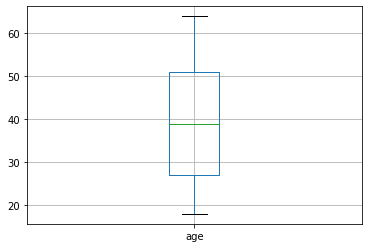

In [26]:
df[['age']].boxplot()

In [3]:
df['sex'].value_counts().to_dict()
df['sex'].replace({'male': 0, 'female':1},inplace=True)


In [4]:
df['smoker'].value_counts().to_dict()

{'no': 1064, 'yes': 274}

In [5]:
df['smoker'].replace({'no': 0, 'yes': 1},inplace =True)
df.drop('region',axis=1,inplace=True) 

In [7]:
x = df.drop('charges',axis=True)
y = df['charges']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state =1)

In [20]:
def scaling(technique_name,xtrain):
    if technique_name == StandardScaler:
        scaled = StandardScaler()
        scaled_model = scaled.fit_transform(xtrain)
    else:
        scaled = MinMaxScaler()
        scaled_model = scaled.fit_transform(xtrain)
    return scaled_model

In [21]:
scaling(StandardScaler,x_train)

array([[-0.77988573,  1.02729152, -0.8056831 , -0.90705928, -0.51770182],
       [-1.28034983, -0.97343352, -0.81466044,  0.73960218, -0.51770182],
       [ 0.1495476 , -0.97343352,  1.55454117, -0.90705928, -0.51770182],
       ...,
       [ 0.86449631,  1.02729152,  0.68945206,  0.73960218,  1.93161385],
       [ 0.07805273,  1.02729152, -1.39002631,  0.73960218,  1.93161385],
       [ 1.29346554, -0.97343352, -0.45638296, -0.08372855, -0.51770182]])

In [22]:
scaling(MinMaxScaler(),x_train)

array([[0.2173913 , 1.        , 0.26472962, 0.        , 0.        ],
       [0.06521739, 0.        , 0.26324993, 0.4       , 0.        ],
       [0.5       , 0.        , 0.65375303, 0.        , 0.        ],
       ...,
       [0.7173913 , 1.        , 0.51116492, 0.4       , 1.        ],
       [0.47826087, 1.        , 0.16841539, 0.4       , 1.        ],
       [0.84782609, 0.        , 0.32230293, 0.2       , 0.        ]])